In [28]:
#Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [29]:
df=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
#showing the data
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
#Preprocssing the dataset
#checking for the missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
#getting the unique value in the target dataset
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [32]:
#splitting the data between the target and feature dataset
y=df['quality']
x=df.drop('quality',axis=1)

In [33]:
#scaling the dataset
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [34]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


# Clustering the feature dataset into 6 different clusters

In [35]:
#creating a instance of a KMeans class
kmeans=KMeans(n_clusters=6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [36]:
cluster=kmeans.predict(x)


In [37]:
cluster

array([4, 4, 4, ..., 3, 4, 3], dtype=int32)

# Visualization

In [40]:
#tranforming the features dataset into two dimensional dataset
#creating a instance of PCA  class
pca=PCA(n_components=2)
#assigning the attributes to the instance
reduced_x=-pd.DataFrame(pca.fit_transform(x),columns=['PC1','PC2'])

# Plotting the Dataset

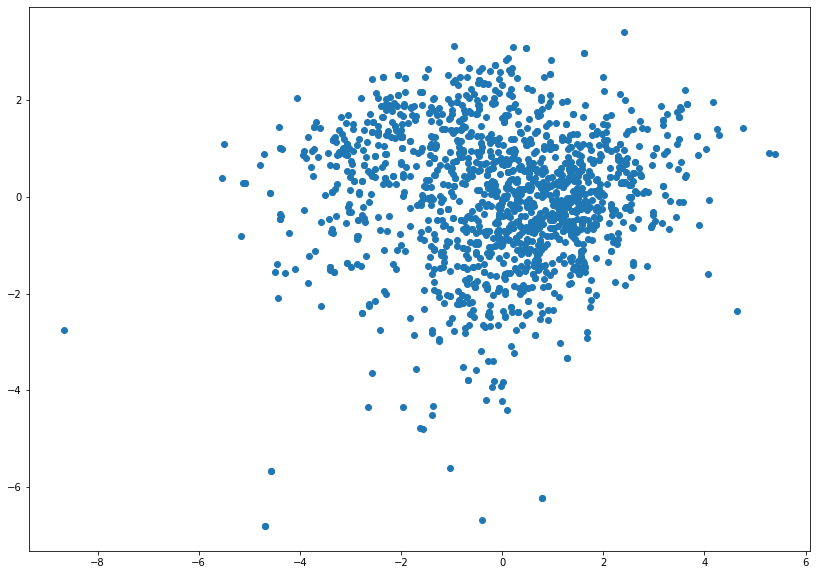

In [42]:
#visulizing the plot
plt.figure(figsize=(14,10))
plt.scatter(reduced_x['PC1'],reduced_x['PC2'])

In [47]:
#reduced the clusters center into two dimentionals plots
reduced_centers=pca.transform(kmeans.cluster_centers_)
reduced_centers

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


array([[ 3.52834398,  1.01049765],
       [ 0.1502256 ,  1.48126418],
       [ 2.0945128 , -0.99977775],
       [-1.32352642, -1.01174136],
       [-1.0699788 ,  0.01513534],
       [ 1.58571538,  3.62081388]])

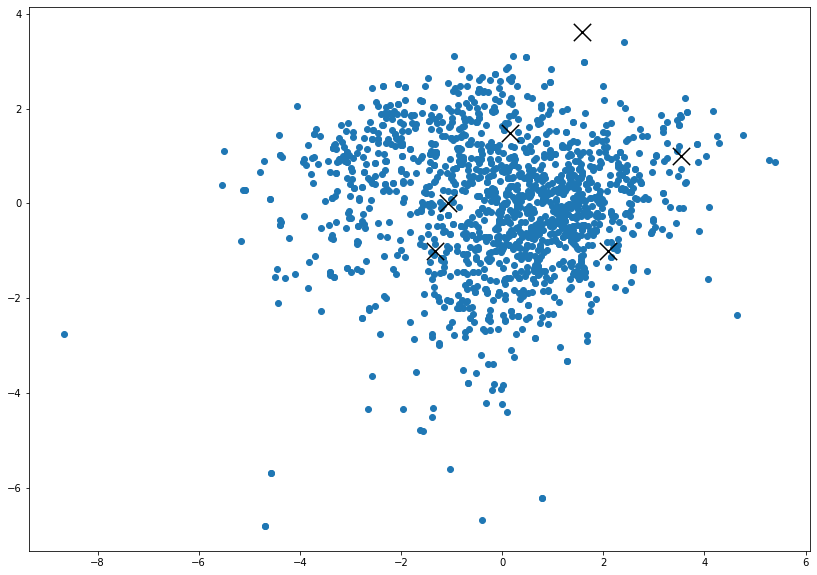

In [48]:
#visualizing the plot
plt.figure(figsize=(14,10))
#using scatterplot two visualize the two dimensional dataset
plt.scatter(reduced_x['PC1'],reduced_x['PC2'])
#again using the scatterplot two visualize the 
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300)
plt.show()

In [52]:
#adding a new column cluster into the reduced_x dataset
reduced_x['cluster']=cluster

In [53]:
reduced_x

,PC1,PC2,cluster
0,1.619530,-0.450950,4
1,0.799170,-1.856553,4
2,0.748479,-0.882039,4
3,-2.357673,0.269976,2
4,1.619530,-0.450950,4
...,...,...,...
1594,2.150500,-0.814286,3
1595,2.214496,-0.893101,3
1596,1.456129,-0.311746,3
1597,2.270518,-0.979791,4


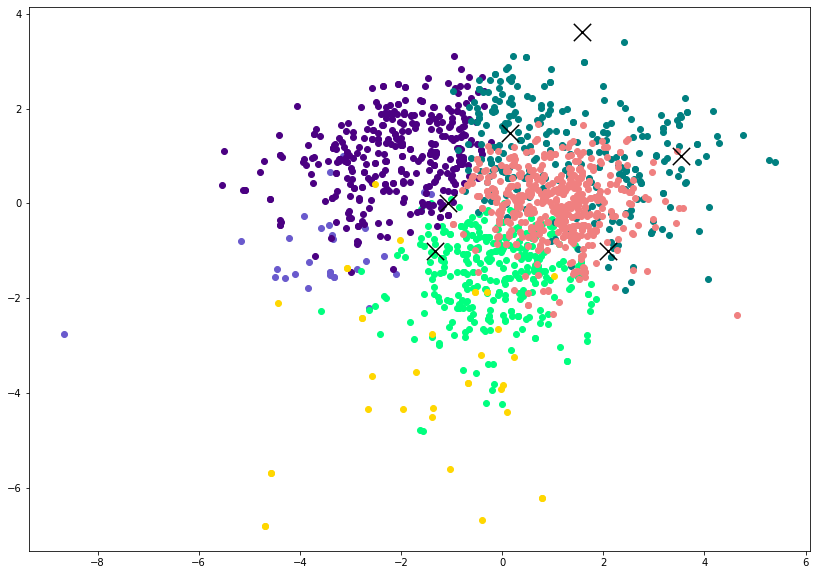

In [56]:
#visulizing the plot
plt.figure(figsize=(14,10))
#using scatterplot two visualize the two dimensional dataset


plt.scatter(reduced_x[reduced_x['cluster']==0].loc[:,'PC1'],reduced_x[reduced_x['cluster']==0].loc[:,'PC2'],color='slateblue')
plt.scatter(reduced_x[reduced_x['cluster']==1].loc[:,'PC1'],reduced_x[reduced_x['cluster']==1].loc[:,'PC2'],color='springgreen')
plt.scatter(reduced_x[reduced_x['cluster']==2].loc[:,'PC1'],reduced_x[reduced_x['cluster']==2].loc[:,'PC2'],color='indigo')
plt.scatter(reduced_x[reduced_x['cluster']==3].loc[:,'PC1'],reduced_x[reduced_x['cluster']==3].loc[:,'PC2'],color='teal')
plt.scatter(reduced_x[reduced_x['cluster']==4].loc[:,'PC1'],reduced_x[reduced_x['cluster']==4].loc[:,'PC2'],color='lightcoral')
plt.scatter(reduced_x[reduced_x['cluster']==5].loc[:,'PC1'],reduced_x[reduced_x['cluster']==5].loc[:,'PC2'],color='gold')
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300)
plt.show()

# Training

In [57]:
#training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


# MLP Classifier

In [61]:
model=MLPClassifier(hidden_layer_sizes=(256,256),max_iter=500)
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

In [63]:
print('Model Accuracy:',model.score(x_test,y_test))

Model Accuracy: 0.659375
